In [3]:
#so i am creating a stock price prediction model for nifty .

In [33]:
# 1-> We will collect the stock Data--TTM--tata motors
# 2->preprocess the Data - train and test
# 3-> Create An Stacked LSTM model
# 4-> Predict the test data and plot ouput 
# 5-> Predict the future 30 Days and plot the output

In [4]:
pip install pandas_datareader


   ---------------------------------------- 0.0/3.8 MB ? eta -:--:--
   -------- ------------------------------- 0.8/3.8 MB 6.7 MB/s eta 0:00:01
   ------------------- -------------------- 1.8/3.8 MB 4.6 MB/s eta 0:00:01
   --------------------------- ------------ 2.6/3.8 MB 4.2 MB/s eta 0:00:01
   ----------------------------------- ---- 3.4/3.8 MB 4.2 MB/s eta 0:00:01
   ---------------------------------------- 3.8/3.8 MB 4.1 MB/s eta 0:00:00

   ---------------------------------------- 0/2 [lxml]
   ---------------------------------------- 0/2 [lxml]
   ---------------------------------------- 0/2 [lxml]
   -------------------- ------------------- 1/2 [pandas_datareader]
   -------------------- ------------------- 1/2 [pandas_datareader]
   -------------------- ------------------- 1/2 [pandas_datareader]
   -------------------- ------------------- 1/2 [pandas_datareader]
   -------------------- ------------------- 1/2 [pandas_datareader]
   -------------------- ------------------- 1

In [7]:
pip install alpha_vantage


   ----- ---------------------------------- 1/8 [multidict]
   --------------- ------------------------ 3/8 [aiohappyeyeballs]
   -------------------- ------------------- 4/8 [yarl]
   ------------------------- -------------- 5/8 [aiosignal]
   ------------------------------ --------- 6/8 [aiohttp]
   ------------------------------ --------- 6/8 [aiohttp]
   ------------------------------ --------- 6/8 [aiohttp]
   ------------------------------ --------- 6/8 [aiohttp]
   ------------------------------ --------- 6/8 [aiohttp]
   ------------------------------ --------- 6/8 [aiohttp]
   ------------------------------ --------- 6/8 [aiohttp]
   ------------------------------ --------- 6/8 [aiohttp]
   ------------------------------ --------- 6/8 [aiohttp]
   ------------------------------ --------- 6/8 [aiohttp]
   ------------------------------ --------- 6/8 [aiohttp]
   ----------------------------------- ---- 7/8 [alpha_vantage]
   ----------------------------------- ---- 7/8 [alpha_

In [ ]:
import pandas_datareader as pdr
from alpha_vantage.timeseries import TimeSeries

key = 'API_KEY'

ts = TimeSeries(key = key,output_format='pandas')

data = ts.get_monthly_adjusted('TTM')

data

(            1. open  2. high  3. low  4. close  5. adjusted close   6. volume  \
 date                                                                            
 2023-05-12    25.14    25.14   25.14     25.14            25.1400         0.0   
 2023-04-28    25.14    25.14   25.14     25.14            25.1400         0.0   
 2023-03-31    25.14    25.14   25.14     25.14            25.1400         0.0   
 2023-02-28    25.14    25.14   25.14     25.14            25.1400         0.0   
 2023-01-31    23.40    25.93   22.61     25.14            25.1400  32189809.0   
 ...             ...      ...     ...       ...                ...         ...   
 2005-02-28    11.35    11.64   10.66     10.88             9.2084   4014900.0   
 2005-01-31    12.22    12.25   10.45     11.63             9.8431   5082700.0   
 2004-12-31    11.00    12.18   10.71     11.92            10.0886   7659800.0   
 2004-11-30     9.20    11.19    9.10     11.13             9.4200   5777800.0   
 2004-10-29     

In [97]:

df = pdr.get_data_alphavantage('TTM', api_key=key) 

In [98]:
df.to_csv('TTM.csv')

In [99]:
import pandas as pd

In [100]:
df=pd.read_csv('TTM.csv')

In [101]:
df.head()

,Unnamed: 0,open,high,low,close,volume
0,2005-06-10,9.78,9.79,9.60,9.64,257100
1,2005-06-13,9.60,9.75,9.59,9.63,144500
2,2005-06-14,9.73,9.73,9.55,9.60,49200
3,2005-06-15,9.60,9.70,9.60,9.60,90600
4,2005-06-16,9.66,9.74,9.62,9.70,178900


In [102]:
df.shape

(4512, 6)

In [103]:
df.tail()

,Unnamed: 0,open,high,low,close,volume
4507,2023-05-08,25.14,25.14,25.14,25.14,0
4508,2023-05-09,25.14,25.14,25.14,25.14,0
4509,2023-05-10,25.14,25.14,25.14,25.14,0
4510,2023-05-11,25.14,25.14,25.14,25.14,0
4511,2023-05-12,25.14,25.14,25.14,25.14,0


In [104]:
df1=df.reset_index()['close']

In [105]:
df1.shape

(4512,)

In [106]:
df1

0        9.64
1        9.63
2        9.60
3        9.60
4        9.70
        ...  
4507    25.14
4508    25.14
4509    25.14
4510    25.14
4511    25.14
Name: close, Length: 4512, dtype: float64

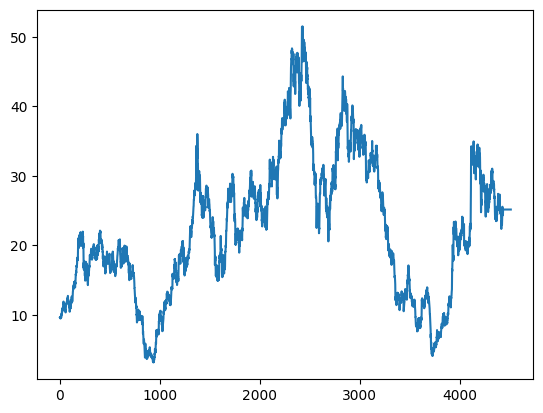

In [107]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [108]:
###LSTM are sensitive to the scale of the data . it is sensitive of scale of data , so we apply MinMax Scaler

In [109]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [110]:
df1

array([[0.13449203],
       [0.13428512],
       [0.13366439],
       ...,
       [0.45520381],
       [0.45520381],
       [0.45520381]])

In [111]:
#splitting the dataset into train and test split 
training_size=int(len(df1)*0.65)
#here i am saying that 65%of my dataset should be for training size
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [112]:
training_size,test_size

(2932, 1580)

In [113]:
import numpy 
# convert an array of value into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0] ### i=0 ,0,1,,2,3
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [114]:
#reshape into X=t, t+1,t+2, t+3 and t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
x_test, y_test = create_dataset(test_data, time_step)

In [115]:
print(X_train.shape), print(y_train.shape)

(2831, 100)
(2831,)


(None, None)

In [116]:
print(x_test.shape), print(y_test.shape)

(1479, 100)
(1479,)


(None, None)

In [117]:
#reshape input to be [samples, time steps, feature] which is required for LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1] , 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1] , 1)

In [118]:
###create the stacked LSTM models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [119]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

C:\Users\mishr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [120]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_6 (LSTM)                        │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_7 (LSTM)                        │ (None, 100, 50)             │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_8 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [121]:
model.fit(X_train, y_train, validation_data=(x_test, y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 8s 106ms/step - loss: 0.0506 - val_loss: 0.0013
Epoch 2/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 4s 95ms/step - loss: 0.0016 - val_loss: 0.0015
Epoch 3/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 5s 108ms/step - loss: 0.0014 - val_loss: 0.0012
Epoch 4/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 5s 102ms/step - loss: 0.0013 - val_loss: 0.0011
Epoch 5/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 5s 105ms/step - loss: 0.0013 - val_loss: 9.8621e-04
Epoch 6/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 5s 101ms/step - loss: 0.0011 - val_loss: 8.8691e-04
Epoch 7/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 5s 113ms/step - loss: 0.0010 - val_loss: 8.0850e-04
Epoch 8/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 5s 119ms/step - loss: 9.7791e-04 - val_loss: 7.6274e-04
Epoch 9/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 5s 116ms/step - loss: 9.4066e-04 - val_loss: 7.2176e-04
Epoch 10/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 5s 100ms/step - loss: 8.3809e-04 - val_loss: 6.9277e-04
Epoch 11/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 5s 107ms/step - loss: 7.5674e-04 - val_loss: 6.8056e-0

In [122]:
import tensorflow as tf

In [123]:
tf.__version__

'2.19.0'

In [124]:
### the prediction and check performance metrices
train_predict=model.predict(X_train)
test_predict= model.predict(x_test)


89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step


In [125]:
#treansform back to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [126]:
#calculate RMSE performance metrics 
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

25.328788116822658

In [127]:
#test Data RMSE
math.sqrt(mean_squared_error(y_test,test_predict))

21.497080551928104

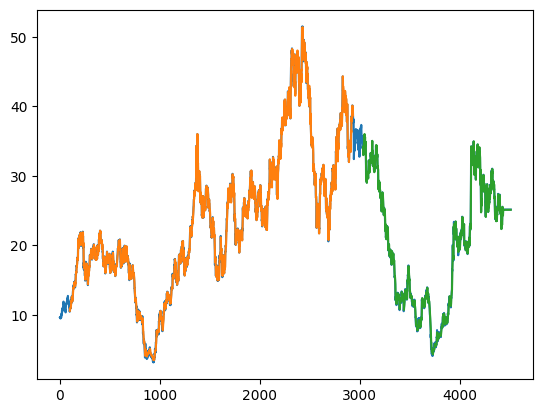

In [128]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [129]:
len(test_data)

1580

In [130]:
x_input=test_data[1480:].reshape(1,-1)
x_input.shape

(1, 100)

In [131]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [132]:
temp_input

[0.44320297951582865,
 0.447341195944548,
 0.43202979515828677,
 0.40802813987171527,
 0.3974756879784813,
 0.4163045727291538,
 0.41733912683633356,
 0.415270018621974,
 0.4132009104076143,
 0.42292571901510445,
 0.4142354645147941,
 0.4107179805503828,
 0.4177529484792054,
 0.43223670597972275,
 0.45603145044485827,
 0.46348024001655286,
 0.45520380715911446,
 0.4504448582660874,
 0.44796192840885585,
 0.4398924063728533,
 0.4380302089799296,
 0.44982412580177944,
 0.45520380715911446,
 0.45520380715911446,
 0.45520380715911446,
 0.45520380715911446,
 0.45520380715911446,
 0.45520380715911446,
 0.45520380715911446,
 0.45520380715911446,
 0.45520380715911446,
 0.45520380715911446,
 0.45520380715911446,
 0.45520380715911446,
 0.45520380715911446,
 0.45520380715911446,
 0.45520380715911446,
 0.45520380715911446,
 0.45520380715911446,
 0.45520380715911446,
 0.45520380715911446,
 0.45520380715911446,
 0.45520380715911446,
 0.45520380715911446,
 0.45520380715911446,
 0.45520380715911446,
 

In [133]:
#demonstrate prdiction for next 10days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.45432293]
101
1 day input [0.4473412  0.4320298  0.40802814 0.39747569 0.41630457 0.41733913
 0.41527002 0.41320091 0.42292572 0.41423546 0.41071798 0.41775295
 0.43223671 0.45603145 0.46348024 0.45520381 0.45044486 0.44796193
 0.43989241 0.43803021 0.44982413 0.45520381 0.45520381 0.45520381
 0.45520381 0.45520381 0.45520381 0.45520381 0.45520381 0.45520381
 0.45520381 0.45520381 0.45520381 0.45520381 0.45520381 0.45520381
 0.45520381 0.45520381 0.45520381 0.45520381 0.45520381 0.45520381
 0.45520381 0.45520381 0.45520381 0.45520381 0.45520381 0.45520381
 0.45520381 0.45520381 0.45520381 0.45520381 0.45520381 0.45520381
 0.45520381 0.45520381 0.45520381 0.45520381 0.45520381 0.45520381
 0.45520381 0.45520381 0.45520381 0.45520381 0.45520381 0.45520381
 0.45520381 0.45520381 0.45520381 0.45520381 0.45520381 0.45520381
 0.45520381 0.45520381 0.45520381 0.45520381 0.45520381 0.45520381
 0.45520381 0.45520381 0.45520381 0.45520381 0.45520381 0.45520381
 0.45520381 0.45520381 0.45520381

In [134]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [135]:
import matplotlib.pyplot as plt

In [136]:
len(df1)

4512

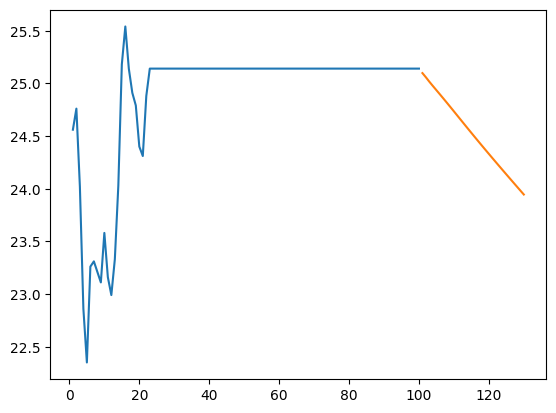

In [138]:
plt.plot(day_new,scaler.inverse_transform(df1[4412:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

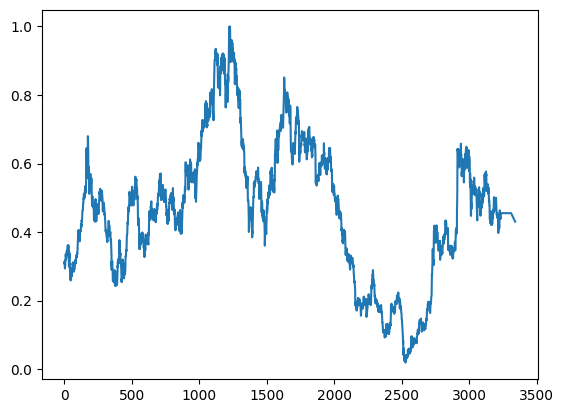

In [141]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [142]:
df3=scaler.inverse_transform(df3).tolist()


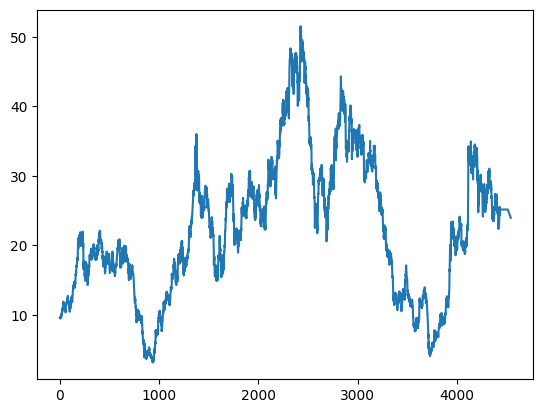

In [143]:
plt.plot(df3)


In [ ]:
###this is the price prediction of my model.. so jao aab dosto..

In [147]:
model.save('TTM_prediction.h5')
